
https://displacy.spacy.io/displacy/index.html?full=Click+the+button+to+see+this+sentence+in+displaCy.

Schools commonly teach that there are 9 parts of speech in English: noun, verb, article, adjective, preposition, pronoun, adverb, conjunction, and interjection.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import nltk

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('data_tau_days.csv')

In [4]:
df.head()

,Unnamed: 0,title,date,days
0,0,10 Years of Open Source Machine Learning,7 points by tstonez 19 hours ago | 1 comment,1
1,1,What machines can learn from Apple Watch: dete...,2 points by koukouhappy 7 hours ago | discuss,1
2,2,The Deep Roots of Javascript Fatigue,3 points by nikkielizdemere 13 hours ago | di...,1
3,3,Data science intro for math/phys background,9 points by pmigdal 1 day ago | discuss,1
4,4,"Data Science Pop-Up in Austin, TX",2 points by AnnaOnTheWeb 13 hours ago | discuss,1


# Now let us visually see which are the words that are most prominent

In [5]:
frequency_words = {}


In [6]:
for data in df['title']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token in frequency_words:
            count = frequency_words[token]
            count = count + 1
            frequency_words[token] = count
        else:
            frequency_words[token] = 1

In [7]:
wordcloud = WordCloud()

In [8]:
wordcloud.generate_from_frequencies(frequency_words.items())

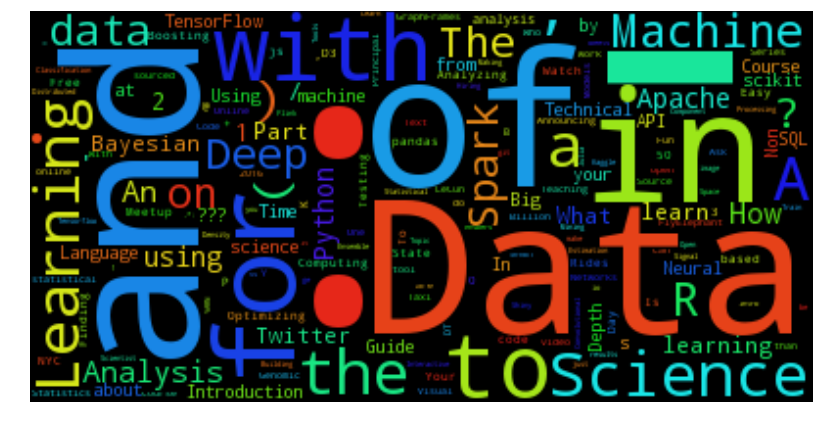

In [9]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [10]:
from nltk.corpus import stopwords

In [11]:
stop = stopwords.words('english')

In [12]:
frequency_words_wo_stop = {}
for data in df['title']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [13]:
wordcloud.generate_from_frequencies(frequency_words_wo_stop.items())

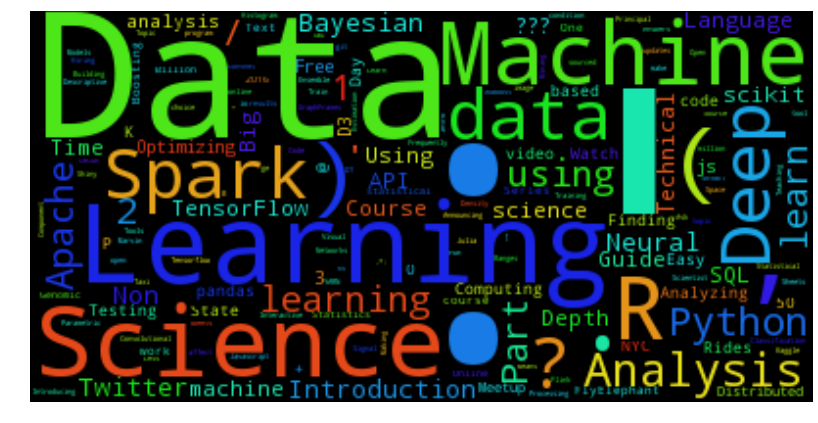

In [14]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [16]:
frequency_words_wo_stop = {}
for data in df['title']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [17]:
wordcloud.generate_from_frequencies(frequency_words_wo_stop.items())

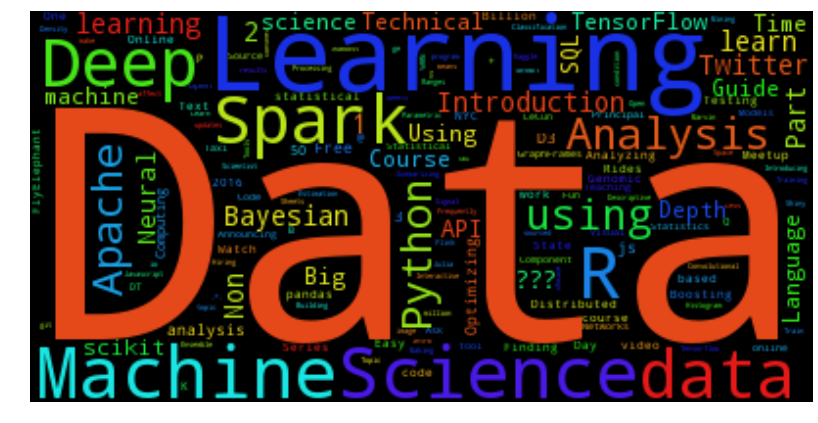

In [18]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [19]:
#Exercise : Using days generate the tag cloud

# Now let us lemma and stem each title 

http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization

In [20]:
from nltk.stem.porter import PorterStemmer

In [21]:
porter_stemmer = PorterStemmer()

In [22]:
porter_stemmer.stem('dividing')

u'divid'

** Download the wordnet corpora using nltk.download() **

In [23]:
from nltk.stem import WordNetLemmatizer

In [24]:
wordnet_lemmatizer = WordNetLemmatizer()

In [25]:
wordnet_lemmatizer.lemmatize('are')

'are'

In [26]:
wordnet_lemmatizer.lemmatize('is')

'is'

But we know that the root of `are` and `is` , is be. The reason why we see `are` and `is` as is , is because we
have to define them as verbs

In [27]:
wordnet_lemmatizer.lemmatize('is',pos='v')

u'be'

In [28]:
def stem_title(data):
    return porter_stemmer.stem(data['title'])

In [29]:
def lemmatize_title(data):
    return wordnet_lemmatizer.lemmatize(data['title'])

In [30]:
df['stem'] = df.apply(stem_title,axis=1)

In [31]:
df.head()

,Unnamed: 0,title,date,days,stem
0,0,10 Years of Open Source Machine Learning,7 points by tstonez 19 hours ago | 1 comment,1,10 Years of Open Source Machine Learn
1,1,What machines can learn from Apple Watch: dete...,2 points by koukouhappy 7 hours ago | discuss,1,What machines can learn from Apple Watch: dete...
2,2,The Deep Roots of Javascript Fatigue,3 points by nikkielizdemere 13 hours ago | di...,1,The Deep Roots of Javascript Fatigu
3,3,Data science intro for math/phys background,9 points by pmigdal 1 day ago | discuss,1,Data science intro for math/phys background
4,4,"Data Science Pop-Up in Austin, TX",2 points by AnnaOnTheWeb 13 hours ago | discuss,1,"Data Science Pop-Up in Austin, TX"


In [32]:
df['lemma'] = df.apply(lemmatize_title,axis=1)

In [33]:
df.head()

,Unnamed: 0,title,date,days,stem,lemma
0,0,10 Years of Open Source Machine Learning,7 points by tstonez 19 hours ago | 1 comment,1,10 Years of Open Source Machine Learn,10 Years of Open Source Machine Learning
1,1,What machines can learn from Apple Watch: dete...,2 points by koukouhappy 7 hours ago | discuss,1,What machines can learn from Apple Watch: dete...,What machines can learn from Apple Watch: dete...
2,2,The Deep Roots of Javascript Fatigue,3 points by nikkielizdemere 13 hours ago | di...,1,The Deep Roots of Javascript Fatigu,The Deep Roots of Javascript Fatigue
3,3,Data science intro for math/phys background,9 points by pmigdal 1 day ago | discuss,1,Data science intro for math/phys background,Data science intro for math/phys background
4,4,"Data Science Pop-Up in Austin, TX",2 points by AnnaOnTheWeb 13 hours ago | discuss,1,"Data Science Pop-Up in Austin, TX","Data Science Pop-Up in Austin, TX"


In [34]:
df.tail()

,Unnamed: 0,title,date,days,stem,lemma
175,175,Finding Nearest Neighbors in SQL,7 points by jonathanbishop 50 days ago | 2 co...,50,Finding Nearest Neighbors in SQL,Finding Nearest Neighbors in SQL
176,176,Free Data Science Curriculum,8 points by Veerle 52 days ago | discuss,52,Free Data Science Curriculum,Free Data Science Curriculum
177,177,Deep Learning is Easy - Learn Something Harder,5 points by ebellm 48 days ago | discuss,48,Deep Learning is Easy - Learn Something Hard,Deep Learning is Easy - Learn Something Harder
178,178,"FlyElephant as a tool for calculations in C++,...",6 points by m31 51 days ago | discuss,51,"FlyElephant as a tool for calculations in C++,...","FlyElephant as a tool for calculations in C++,..."
179,179,Yahoo Releases the Largest-ever Machine Learni...,13 points by srinify 62 days ago | 1 comment,62,Yahoo Releases the Largest-ever Machine Learni...,Yahoo Releases the Largest-ever Machine Learni...


** Stemming and Lemma in the context of Recall ** 

# POS tagging

In [35]:
text = 'Calvin harris is a great musician'

In [36]:
text_tokens = nltk.wordpunct_tokenize(text)

In [37]:
text_tokens

['Calvin', 'harris', 'is', 'a', 'great', 'musician']

** from nltk download averaged perceptron tagger**

In [38]:
nltk.pos_tag(text_tokens)

[('Calvin', 'NNP'),
 ('harris', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('musician', 'NN')]

**Tag	Meaning	English Examples**

ADJ	adjective	new, good, high, special, big, local

ADP	adposition	on, of, at, with, by, into, under

ADV	adverb	really, already, still, early, now

CONJ	conjunction	and, or, but, if, while, although

DET	determiner, article	the, a, some, most, every, no, which

NOUN	noun	year, home, costs, time, Africa

NUM	numeral	twenty-four, fourth, 1991, 14:24

PRT	particle	at, on, out, over per, that, up, with

PRON	pronoun	he, their, her, its, my, I, us

VERB	verb	is, say, told, given, playing, would

0	punctuation marks	. , ; !

X	other	ersatz, esprit, dunno, gr8, univeristy



In [39]:
# now let us generate tags for each title

In [40]:
def get_pos_tags(data):
    return nltk.pos_tag(nltk.wordpunct_tokenize(data['title']))

In [41]:
df['pos_tags'] = df.apply(get_pos_tags,axis=1)

In [42]:
df.head()

,Unnamed: 0,title,date,days,stem,lemma,pos_tags
0,0,10 Years of Open Source Machine Learning,7 points by tstonez 19 hours ago | 1 comment,1,10 Years of Open Source Machine Learn,10 Years of Open Source Machine Learning,"[(10, CD), (Years, NNS), (of, IN), (Open, NNP)..."
1,1,What machines can learn from Apple Watch: dete...,2 points by koukouhappy 7 hours ago | discuss,1,What machines can learn from Apple Watch: dete...,What machines can learn from Apple Watch: dete...,"[(What, WP), (machines, NNS), (can, MD), (lear..."
2,2,The Deep Roots of Javascript Fatigue,3 points by nikkielizdemere 13 hours ago | di...,1,The Deep Roots of Javascript Fatigu,The Deep Roots of Javascript Fatigue,"[(The, DT), (Deep, NNP), (Roots, NNP), (of, IN..."
3,3,Data science intro for math/phys background,9 points by pmigdal 1 day ago | discuss,1,Data science intro for math/phys background,Data science intro for math/phys background,"[(Data, NNP), (science, NN), (intro, NN), (for..."
4,4,"Data Science Pop-Up in Austin, TX",2 points by AnnaOnTheWeb 13 hours ago | discuss,1,"Data Science Pop-Up in Austin, TX","Data Science Pop-Up in Austin, TX","[(Data, NNP), (Science, NNP), (Pop, NNP), (-, ..."


** Now using pos tags we can extract entities i.e find the primary focus of the sentence **

 <img src="entity_extraction.png" width=400>

** We already have pos tags - now all we need is chunking **

The basic technique we will use for entity detection is chunking, which segments and labels multi-token sequences as illustrated in 2.1. The smaller boxes show the word-level tokenization and part-of-speech tagging, while the large boxes show higher-level chunking. Each of these larger boxes is called a chunk. Like tokenization, which omits whitespace, chunking usually selects a subset of the tokens. Also like tokenization, the pieces produced by a chunker do not overlap in the source text.

<img src="chunk-segmentation.png" width=400/>


Named Entity-Type	        Examples

ORGANIZATION	Georgia-Pacific Corp., WHO

PERSON	        Eddy Bonte, President Obama

LOCATION	    Murray River, Mount Everest

DATE	        June, 2008-06-29

TIME	        two fifty a m, 1:30 p.m.

MONEY	        175 million Canadian Dollars, GBP 10.40

PERCENT	        twenty pct, 18.75 %

FACILITY	    Washington Monument, Stonehenge

GPE	            South East Asia, Midlothian

** Download the maxent chunker and words corpora **

In [80]:
ne_tree = nltk.ne_chunk(df.pos_tags[0],binary=True)

In [44]:
#import tkinter

In [45]:
#ne_tree.draw()

** have to install the python-tk package to visualize the tree**

In [46]:
#ne_tree

In [47]:
#ne_tree.draw()

In [108]:
for x in ne_tree:
    print(x)

('10', 'CD')
('Years', 'NNS')
('of', 'IN')
(NE Open/NNP Source/NNP Machine/NNP)
('Learning', 'NNP')


In [110]:
# we want only the NE ones and when print the type we see that it is a tree
# so we need to iterate over the tree and get the NE

In [111]:
for x in ne_tree:
    print(type(x))
    if type(x) == nltk.tree.Tree:
        if(x.label()) == 'NE':
            print(x)
        

<type 'tuple'>
<type 'tuple'>
<type 'tuple'>
<class 'nltk.tree.Tree'>
(NE Open/NNP Source/NNP Machine/NNP)
<type 'tuple'>


In [89]:
ne_tree.label

<bound method Tree.label of Tree('S', [('10', 'CD'), ('Years', 'NNS'), ('of', 'IN'), Tree('NE', [('Open', 'NNP'), ('Source', 'NNP'), ('Machine', 'NNP')]), ('Learning', 'NNP')])>

In [49]:
for m in ne_tree.leaves():
    print(m)

('10', 'CD')
('Years', 'NNS')
('of', 'IN')
('Open', 'NNP')
('Source', 'NNP')
('Machine', 'NNP')
('Learning', 'NNP')


In [141]:
def get_entities(row):
    entities=[]
    chunked_tree = nltk.ne_chunk(row.pos_tags,binary=True)
    for nodes in chunked_tree:
        if type(nodes) == nltk.tree.Tree:
            if(nodes.label()) == 'NE':
                print(nodes.leaves())
                zipped_list = zip(*nodes.leaves())
                print(zipped_list)
                entities.append(' '.join(zipped_list[0]))
    return entities

In [142]:
df['named_entities'] = df.apply(get_entities,axis=1)

[('Open', 'NNP'), ('Source', 'NNP'), ('Machine', 'NNP')]
[('Open', 'Source', 'Machine'), ('NNP', 'NNP', 'NNP')]
[('Apple', 'NNP'), ('Watch', 'NNP')]
[('Apple', 'Watch'), ('NNP', 'NNP')]
[('Deep', 'NNP'), ('Roots', 'NNP')]
[('Deep', 'Roots'), ('NNP', 'NNP')]
[('Javascript', 'NNP'), ('Fatigue', 'NNP')]
[('Javascript', 'Fatigue'), ('NNP', 'NNP')]
[('Data', 'NNP')]
[('Data',), ('NNP',)]
[('Data', 'NNP'), ('Science', 'NNP'), ('Pop', 'NNP')]
[('Data', 'Science', 'Pop'), ('NNP', 'NNP', 'NNP')]
[('Austin', 'NNP')]
[('Austin',), ('NNP',)]
[('Data', 'NNP'), ('Science', 'NNP'), ('Tools', 'NNP')]
[('Data', 'Science', 'Tools'), ('NNP', 'NNP', 'NNP')]
[('Biggest', 'NNP'), ('Winners', 'NNPS')]
[('Biggest', 'Winners'), ('NNP', 'NNPS')]
[('Golden', 'NNP'), ('State', 'NNP'), ('Warriors', 'NNP')]
[('Golden', 'State', 'Warriors'), ('NNP', 'NNP', 'NNP')]
[('GraphFrames', 'NNP')]
[('GraphFrames',), ('NNP',)]
[('Spark', 'NNP')]
[('Spark',), ('NNP',)]
[('Neural', 'JJ'), ('Networks', 'NNP')]
[('Neural', 'Netwo

In [143]:
df.head()

,Unnamed: 0,title,date,days,stem,lemma,pos_tags,chunked_tree,named_entities
0,0,10 Years of Open Source Machine Learning,7 points by tstonez 19 hours ago | 1 comment,1,10 Years of Open Source Machine Learn,10 Years of Open Source Machine Learning,"[(10, CD), (Years, NNS), (of, IN), (Open, NNP)...","[(10, CD), (Years, NNS), (of, IN), [(Open, NNP...",[Open Source Machine]
1,1,What machines can learn from Apple Watch: dete...,2 points by koukouhappy 7 hours ago | discuss,1,What machines can learn from Apple Watch: dete...,What machines can learn from Apple Watch: dete...,"[(What, WP), (machines, NNS), (can, MD), (lear...","[(What, WP), (machines, NNS), (can, MD), (lear...",[Apple Watch]
2,2,The Deep Roots of Javascript Fatigue,3 points by nikkielizdemere 13 hours ago | di...,1,The Deep Roots of Javascript Fatigu,The Deep Roots of Javascript Fatigue,"[(The, DT), (Deep, NNP), (Roots, NNP), (of, IN...","[(The, DT), [(Deep, NNP), (Roots, NNP)], (of, ...","[Deep Roots, Javascript Fatigue]"
3,3,Data science intro for math/phys background,9 points by pmigdal 1 day ago | discuss,1,Data science intro for math/phys background,Data science intro for math/phys background,"[(Data, NNP), (science, NN), (intro, NN), (for...","[[(Data, NNP)], (science, NN), (intro, NN), (f...",[Data]
4,4,"Data Science Pop-Up in Austin, TX",2 points by AnnaOnTheWeb 13 hours ago | discuss,1,"Data Science Pop-Up in Austin, TX","Data Science Pop-Up in Austin, TX","[(Data, NNP), (Science, NNP), (Pop, NNP), (-, ...","[[(Data, NNP)], [(Science, NNP), (Pop, NNP)], ...","[Data Science Pop, Austin]"


** Now that we have entities, we can understand the statements better **

# Now let us do some sentiment analysis